In [1]:
from __future__ import print_function
import argparse
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
from utils import pgd_, fgsm_, gradient_information, adversarial_accuracy, gradient_norm
from Nets import MNIST_Net, Gradient_Masked_MNIST, PGD_MNIST
%load_ext autoreload
%autoreload 2
%aimport utils, Nets

## Train a NeuralNet to run experiments on

In [72]:
device = torch.device("cuda")
batch_size = 64
test_batch_size = 1000
epochs = 10
log_interval = 500
binary = False
model = MNIST_Net(device=device, log_interval=log_interval, batch_size=batch_size, test_batch_size=test_batch_size, binary=binary)
model.train_on_data(epochs)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.284348
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.283884

Test set: Average loss: 0.0002, Accuracy: 56292/60000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.511254
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.129026

Test set: Average loss: 0.0001, Accuracy: 57427/60000 (96%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.208828
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.148857

Test set: Average loss: 0.0001, Accuracy: 57988/60000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.202015
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.189248

Test set: Average loss: 0.0001, Accuracy: 58382/60000 (97%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.113353
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.069508

Test set: Average loss: 0.0001, Accuracy: 58654/60000 (98%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.170910
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.085779

Test set: Average loss: 0.0001, Accuracy: 58832/60000 (98%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.059140
Train Epoch: 

## Attack

In [87]:
adversarial_dataset = torch.utils.data.Subset(model.test_dataset, [i for i in range(1000)])
adversarial_loader = torch.utils.data.DataLoader(adversarial_dataset, batch_size=32, num_workers=2, shuffle=False)
adv = adversarial_accuracy(model, adversarial_loader, attack=pgd_, eps=1, step=0.1, iters=10)

0 / 1000
1.7999999999999998


In [74]:
adv.shape

torch.Size([8, 1, 28, 28])

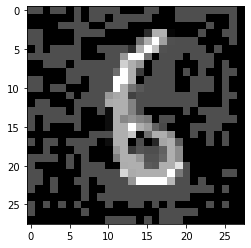

In [75]:
plt.imshow(adv[4].cpu().detach().squeeze().numpy(), cmap='gray')
plt.show()

## Load Gradient Masked Network

In [76]:
masked_model = Gradient_Masked_MNIST(device=device, log_interval=log_interval, batch_size=batch_size, test_batch_size=test_batch_size, eps=1, binary=binary)
masked_model.train_on_data(epochs)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.347662
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.682090

Test set: Average loss: 0.0005, Accuracy: 54318/60000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.163542
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.159381

Test set: Average loss: 0.0003, Accuracy: 56770/60000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.102043
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.780907

Test set: Average loss: 0.0002, Accuracy: 57702/60000 (96%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.890302
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.880091

Test set: Average loss: 0.0001, Accuracy: 58135/60000 (97%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.694158
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.658931

Test set: Average loss: 0.0001, Accuracy: 58407/60000 (97%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.844700
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.602179

Test set: Average loss: 0.0001, Accuracy: 58593/60000 (98%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.693250
Train Epoch: 

## Attack

In [88]:
adversarial_dataset = torch.utils.data.Subset(masked_model.test_dataset, [i for i in range(1000)])
adversarial_loader = torch.utils.data.DataLoader(adversarial_dataset, batch_size=32, num_workers=2, shuffle=False)
adversarial_accuracy(masked_model, adversarial_loader, attack=pgd_, eps=1, step=0.1, iters=10)

0 / 1000
24.8


tensor([[[[-1.2421e-01, -4.2421e-01, -4.2421e-01,  ...,  7.5787e-02,
            2.5673e-01,  4.7579e-01],
          [ 4.7579e-01,  5.7579e-01,  2.7579e-01,  ..., -4.2421e-01,
           -4.2421e-01, -3.2421e-01],
          [ 2.6873e-01,  4.7579e-01,  5.3708e-01,  ..., -3.2421e-01,
           -2.3441e-01, -4.2421e-01],
          ...,
          [ 3.5861e-01,  4.7579e-01,  5.6047e-01,  ..., -4.2421e-01,
           -3.2421e-01,  5.7579e-01],
          [ 4.7579e-01,  3.6535e-01,  2.9291e-01,  ..., -4.2421e-01,
           -1.2421e-01, -4.2421e-01],
          [ 1.2735e-01, -4.2421e-01, -4.2421e-01,  ..., -4.2421e-01,
            1.7579e-01,  4.7579e-01]]],


        [[[ 2.7579e-01,  7.5787e-02, -3.2421e-01,  ..., -3.0975e-01,
           -3.2421e-01, -4.2561e-02],
          [-3.3075e-02,  2.7579e-01, -2.2421e-01,  ..., -4.2421e-01,
           -1.2421e-01, -1.2421e-01],
          [ 7.5787e-02,  1.7579e-01, -3.2421e-01,  ..., -2.9075e-01,
           -3.9854e-01,  7.5787e-02],
          ...,
   

## Load PGD trained network

In [83]:
pgd_model = PGD_MNIST(device=device, log_interval=log_interval, batch_size=batch_size, test_batch_size=test_batch_size, eps=1, step=0.2, iters=7, binary=binary)
pgd_model.train_on_data(epochs)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.440084
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.302186

Test set: Average loss: 0.0013, Accuracy: 44334/60000 (74%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.033499
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.735892

Test set: Average loss: 0.0005, Accuracy: 55060/60000 (92%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.303441
Train Epoch: 3 [32000/60000 (53%)]	Loss: 1.235090

Test set: Average loss: 0.0003, Accuracy: 56897/60000 (95%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.475070
Train Epoch: 4 [32000/60000 (53%)]	Loss: 1.017604

Test set: Average loss: 0.0002, Accuracy: 57521/60000 (96%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.927771
Train Epoch: 5 [32000/60000 (53%)]	Loss: 1.076525

Test set: Average loss: 0.0002, Accuracy: 58039/60000 (97%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.804776
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.797958

Test set: Average loss: 0.0002, Accuracy: 58277/60000 (97%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.983850
Train Epoch: 

## Attack

In [89]:
adversarial_dataset = torch.utils.data.Subset(pgd_model.test_dataset, [i for i in range(1000)])
adversarial_loader = torch.utils.data.DataLoader(adversarial_dataset, batch_size=32, num_workers=2, shuffle=False)
adversarial_accuracy(pgd_model, adversarial_loader, attack=pgd_, eps=1, step=0.1, iters=10)

0 / 1000
88.8


tensor([[[[-0.4242, -0.3242,  0.1626,  ...,  0.5758,  0.5758,  0.2629],
          [-0.4242,  0.2758, -0.3242,  ..., -0.4242, -0.2242, -0.3242],
          [ 0.0476, -0.4242, -0.3242,  ..., -0.0969, -0.4242, -0.0925],
          ...,
          [-0.3242, -0.4242, -0.4242,  ..., -0.2242,  0.5758,  0.0100],
          [-0.3242, -0.1242,  0.5758,  ..., -0.3242,  0.2482,  0.3758],
          [ 0.2758,  0.4758, -0.4242,  ..., -0.4242, -0.4242, -0.2702]]],


        [[[ 0.0758, -0.3242, -0.4242,  ..., -0.4242, -0.4242,  0.1758],
          [-0.4242, -0.1242,  0.0137,  ..., -0.2242,  0.2758, -0.3242],
          [-0.4242,  0.5758, -0.1242,  ..., -0.2242, -0.4242,  0.1547],
          ...,
          [ 0.5758, -0.2242, -0.3026,  ..., -0.1242, -0.3242,  0.4758],
          [ 0.5758, -0.3242,  0.5758,  ...,  0.3679,  0.1406,  0.0758],
          [ 0.2576, -0.3242,  0.2531,  ..., -0.1242, -0.4242,  0.0758]]],


        [[[ 0.0758,  0.0682,  0.5758,  ..., -0.4242, -0.0389, -0.0242],
          [ 0.2758,  0.075

## Gradient masking metric
Check alignment of gradient at adv point with (adv point - original point)

run pgd until youve crossed the decision boundary

### Normal network

In [114]:
n_examples = 2000
x = torch.cat([model.train_dataset[i][0].unsqueeze(0) for i in range(n_examples)]).to(device)
y = torch.LongTensor([model.train_dataset[i][1] for i in range(n_examples)]).to(device)

In [115]:
np.nanmean(gradient_information(model, x, y, iters=100, eps=0.5, clip_min=model.normalized_min, clip_max=model.normalized_max, device=device).detach().cpu().numpy())

817 adv. examples found from 2000 data points


0.47582945

### FGSM trained network

In [116]:
n_examples = 2000
x = torch.cat([masked_model.train_dataset[i][0].unsqueeze(0) for i in range(n_examples)]).to(device)
y = torch.LongTensor([masked_model.train_dataset[i][1] for i in range(n_examples)]).to(device)

In [117]:
np.nanmean(gradient_information(masked_model, x, y, iters=100, eps=0.5, clip_min=masked_model.normalized_min, clip_max=masked_model.normalized_max, device=device).detach().cpu().numpy())

278 adv. examples found from 2000 data points


0.39267302

### PGD trained network

In [118]:
n_examples = 2000
x = torch.cat([pgd_model.train_dataset[i][0].unsqueeze(0) for i in range(n_examples)]).to(device)
y = torch.LongTensor([pgd_model.train_dataset[i][1] for i in range(n_examples)]).to(device)

In [119]:
np.nanmean(gradient_information(pgd_model, x, y, iters=100, eps=0.5, clip_min=pgd_model.normalized_min, clip_max=pgd_model.normalized_max, device=device).detach().cpu().numpy())

127 adv. examples found from 2000 data points


0.17165454

### Check gradient norms

In [27]:
n_examples = 2000
x = torch.cat([masked_model.train_dataset[i][0].unsqueeze(0) for i in range(n_examples)]).to(device)
y = torch.LongTensor([masked_model.train_dataset[i][1] for i in range(n_examples)]).to(device)

In [28]:
gradient_norm(model, x, y, device=device), gradient_norm(masked_model, x, y, device=device), gradient_norm(pgd_model, x, y, device=device)

(tensor(3.1198e-05, device='cuda:0'),
 tensor(1.9965e-05, device='cuda:0'),
 tensor(2.1970e-05, device='cuda:0'))

## Adversarial Training

In [93]:
def adv_train(model, device, train_loader, optimizer, epochs):
    model.train()
    criterion = nn.CrossEntropyLoss()
    for epoch in range(epochs + 1):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            adv_data = pgd_(model, data, target, 0.1, 0.5, iters=7, targeted=False, device=device, clip_min=normalized_min, clip_max=normalized_max)
            optimizer.zero_grad()
            output = model(adv_data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))

In [55]:
undefended_model = type(model)().to(device)
undefended_model.load_state_dict(model.state_dict())
adv_train(model, device, train_loader, optimizer, 4)

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.735852
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.935562
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.539442
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.542072
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.375298
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.234662
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.547802
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.331915
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.199902
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.282771
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.450014
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.228553
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.216324
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.487287
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.375047
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.198464
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.329873
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.318543
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.161249
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.292225
Train Epoch:

In [56]:
adversarial_accuracy(model, adversarial_loader)

0 / 1000
200 / 1000
400 / 1000
600 / 1000
800 / 1000
94.19999999999999


## Black Box Attack

In [90]:
def black_box_adversarial_accuracy(model, surrogate_model, dataset_loader):
    correct = 0
    for batch_idx, (data, target) in enumerate(dataset_loader):
        data, target = data.to(device), target.to(device)
        adv = pgd_(surrogate_model, data, target, step=0.1, eps=1, iters=10, targeted=False, device=device, clip_min=model.normalized_min, clip_max=model.normalized_max)
        output = model(adv)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        if (batch_idx % 100 == 0):
            print('{} / {}'.format(batch_idx * dataset_loader.batch_size, len(dataset_loader.dataset)))
    print ((correct/len(dataset_loader.dataset) * 100))

In [94]:
surrogate_model = MNIST_Net(device=device, log_interval=log_interval, batch_size=batch_size, test_batch_size=test_batch_size, oracle=pgd_model, binary=binary)
surrogate_model.train_on_data(epochs)
adversarial_dataset = torch.utils.data.Subset(pgd_model.test_dataset, [i for i in range(1000)])
adversarial_loader = torch.utils.data.DataLoader(adversarial_dataset, batch_size=32, num_workers=2, shuffle=False)
black_box_adversarial_accuracy(pgd_model, surrogate_model, adversarial_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.336703
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.276337

Test set: Average loss: 0.0002, Accuracy: 55675/60000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.394428
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.327104

Test set: Average loss: 0.0002, Accuracy: 56708/60000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.376951
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.123159

Test set: Average loss: 0.0002, Accuracy: 57187/60000 (95%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.219509
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.434879

Test set: Average loss: 0.0001, Accuracy: 57507/60000 (96%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.155790
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.104833

Test set: Average loss: 0.0001, Accuracy: 57805/60000 (96%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.195729
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.250705

Test set: Average loss: 0.0001, Accuracy: 57827/60000 (96%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.087341
Train Epoch: 

In [95]:
surrogate_model = MNIST_Net(device=device, log_interval=log_interval, batch_size=batch_size, test_batch_size=test_batch_size, oracle=masked_model, binary=binary)
surrogate_model.train_on_data(epochs)
adversarial_dataset = torch.utils.data.Subset(masked_model.test_dataset, [i for i in range(1000)])
adversarial_loader = torch.utils.data.DataLoader(adversarial_dataset, batch_size=32, num_workers=2, shuffle=False)
black_box_adversarial_accuracy(masked_model, surrogate_model, adversarial_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.312138
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.323271

Test set: Average loss: 0.0002, Accuracy: 56043/60000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.389748
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.343549

Test set: Average loss: 0.0002, Accuracy: 56960/60000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.072214
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.191582

Test set: Average loss: 0.0002, Accuracy: 57303/60000 (96%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.089042
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.148751

Test set: Average loss: 0.0001, Accuracy: 57661/60000 (96%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.073518
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.212289

Test set: Average loss: 0.0001, Accuracy: 57853/60000 (96%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.146805
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.062624

Test set: Average loss: 0.0001, Accuracy: 58059/60000 (97%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.260564
Train Epoch: 